# Imports

In [ ]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Step 1: Define Constants
EMOTIONS = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

# Specify the path to your main dataset folder containing subfolders for each emotion
DATA_DIR = "C:/Users/karim/Desktop/VSCode_Projects/FER/data2/data"

## the function uploads images and saves them in images array with their respective emotion in labels array

In [3]:
# Step 2: Load and Preprocess Data
def load_images(folder):
    images = []
    labels = []
    for emotion_folder in os.listdir(folder):
        path = os.path.join(folder, emotion_folder)
        if os.path.isdir(path):
            label = int(emotion_folder)  # Convert folder name to label
            for filename in os.listdir(path):
                img_path = os.path.join(path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

## loads images into X and their respective labels in Y

In [4]:
X_train, y_train = load_images(os.path.join(DATA_DIR, "train"))
X_test, y_test = load_images(os.path.join(DATA_DIR, "test"))
X_val, y_val = load_images(os.path.join(DATA_DIR, "val"))

In [5]:
X_train = X_train.reshape((-1, 48, 48, 1)).astype('float32') / 255.0
X_val = X_val.reshape((-1, 48, 48, 1)).astype('float32') / 255.0
X_test = X_test.reshape((-1, 48, 48, 1)).astype('float32') / 255.0

## categorizing images into their respective labels using one-hot encoding

In [6]:
train_labels = tf.keras.utils.to_categorical(y_train)
test_labels = tf.keras.utils.to_categorical(y_test)
val_labels = tf.keras.utils.to_categorical(y_val)

## training model with two layers and a third layer for categorization into 7 classes

In [20]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(48, 48, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

history = model.fit(X_train, train_labels, batch_size=1, epochs=3, validation_data=(X_val, val_labels))

Epoch 1/30
981/981 [==============================] - 11s 10ms/step - loss: 2.6955 - accuracy: 0.2436 - val_loss: 1.8805 - val_accuracy: 0.4139
Epoch 2/30
981/981 [==============================] - 9s 9ms/step - loss: 1.7200 - accuracy: 0.3394 - val_loss: 3.2821 - val_accuracy: 0.4679
Epoch 3/30
981/981 [==============================] - 9s 9ms/step - loss: 1.5904 - accuracy: 0.4118 - val_loss: 1.5544 - val_accuracy: 0.5189
Epoch 4/30
981/981 [==============================] - 9s 9ms/step - loss: 1.5045 - accuracy: 0.4281 - val_loss: 1.4829 - val_accuracy: 0.4893
Epoch 5/30
981/981 [==============================] - 9s 9ms/step - loss: 1.4827 - accuracy: 0.4434 - val_loss: 3.6014 - val_accuracy: 0.4628
Epoch 6/30
981/981 [==============================] - 9s 9ms/step - loss: 1.4432 - accuracy: 0.4567 - val_loss: 2.3904 - val_accuracy: 0.5270
Epoch 7/30
981/981 [==============================] - 9s 9ms/step - loss: 1.4007 - accuracy: 0.4750 - val_loss: 3.7267 - val_accuracy: 0.4862
Epoc

## plotting the graphs between training accuracy and it's loss and validation accuracy and it's loss

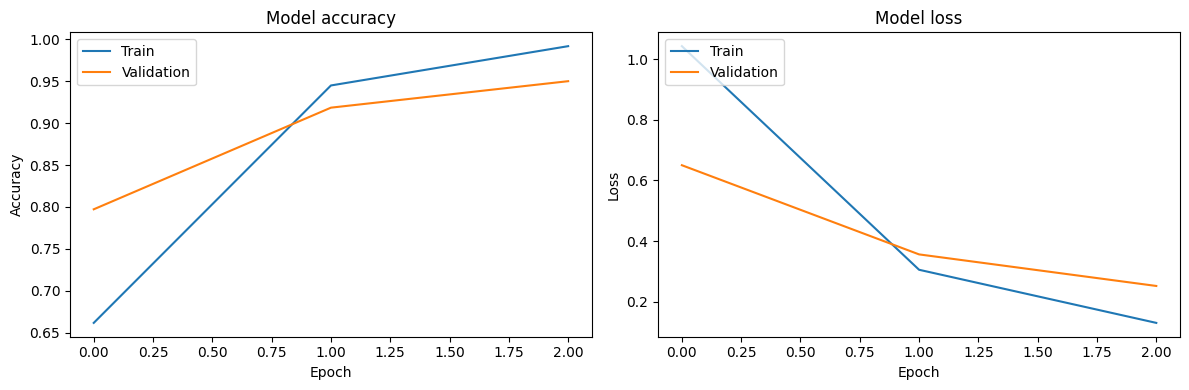

In [24]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_training_history(history)

## Evaluating the model then picking 7 random images from each emotion then makes a prediction using it's trained model

Testing Set Evaluation:
31/31 [==============================] - 1s 10ms/step - loss: 0.2521 - accuracy: 0.9501
Accuracy: 95.01%
1/1 [==============================] - 0s 32ms/step


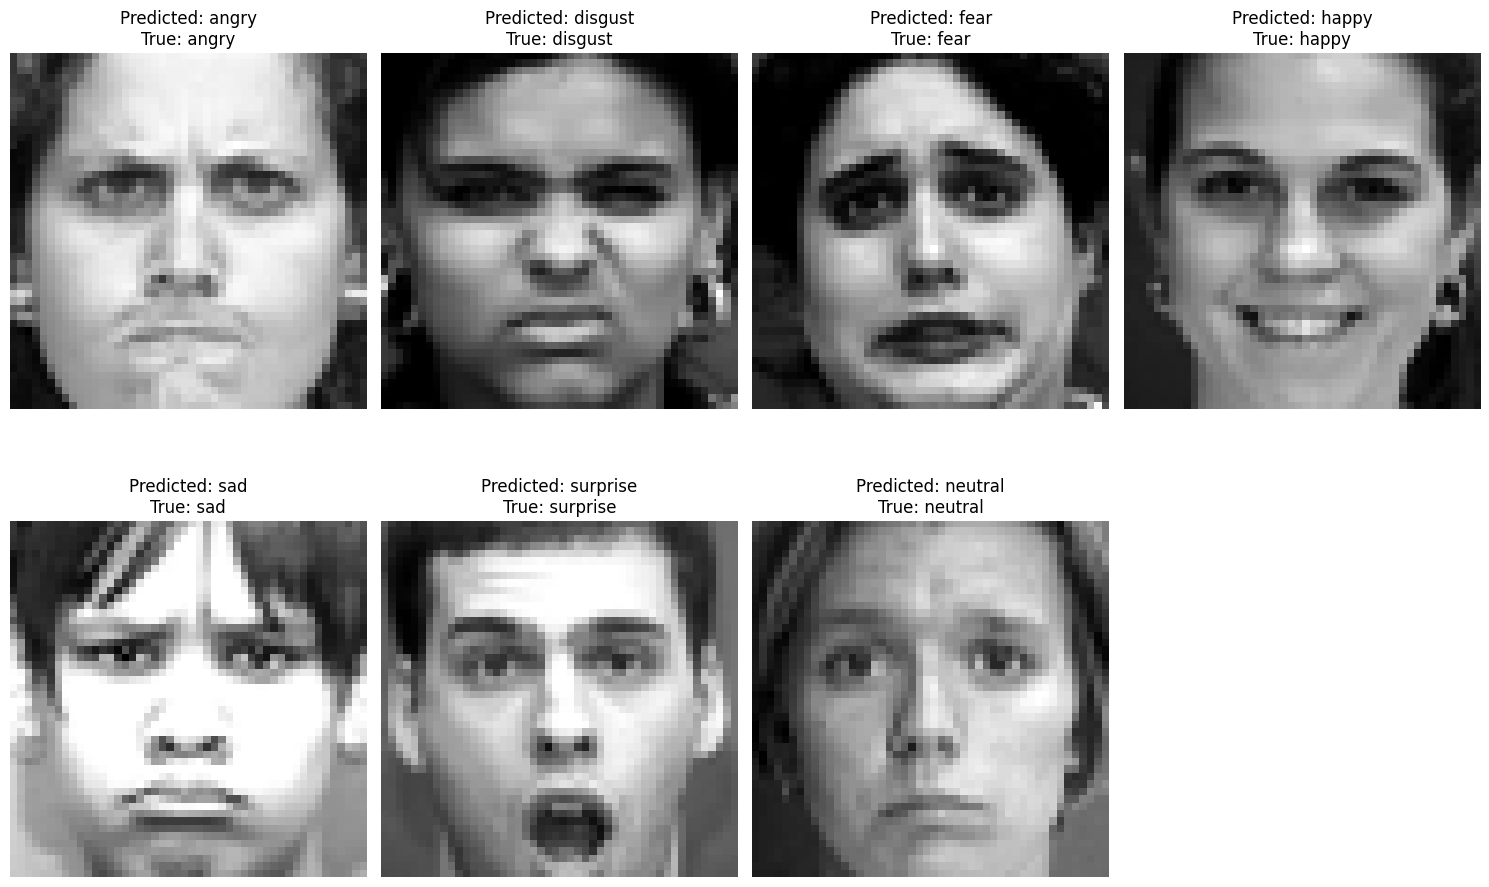

In [25]:
# Step 5: Evaluate the Model
def evaluate_model(model, X, y):
    _, accuracy = model.evaluate(X, y)
    print(f"Accuracy: {accuracy * 100:.2f}%")

print("Testing Set Evaluation:")
evaluate_model(model, X_test, test_labels)

# Step 6: Make Predictions
def predict_emotion(model, image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (48, 48))
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=0)
        output = model.predict(img)
        emotion_index = np.argmax(output)
        predicted_emotion = EMOTIONS[emotion_index]
        return predicted_emotion
    else:
        print(f"Error loading image: {image_path}")
        return None


def predict_on_images(model, X_val, y_val):
    plt.figure(figsize=(15, 10))

    for i in range(7):  # Iterate through folders 0 to 6
        folder_path = os.path.join(DATA_DIR, "val", str(i))
        # Get a list of all images in the folder
        image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
        
        if image_files:
            # Select a random image from the folder
            image_filename = random.choice(image_files)
            image_path = os.path.join(folder_path, image_filename)
            # Normalize the path to handle spaces
            image_path = os.path.normpath(image_path)

            predicted_emotion = predict_emotion(model, image_path)

            if predicted_emotion is not None:
                true_emotion = EMOTIONS[i]

                plt.subplot(2, 4, i + 1)
                plt.imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
                plt.title(f"Predicted: {predicted_emotion}\nTrue: {true_emotion}")
                plt.axis('off')
            else:
                print("Skipping due to an error.")
        else:
            print(f"No images found in folder {i}.")

    plt.tight_layout()
    plt.show()

# Predict on random images from the validation set
predict_on_images(model, X_val, y_val)